In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(7)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False


In [3]:
combats = pd.read_csv('combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
pokemon_266_298 = pokemon[pokemon['#'].isin([266, 298])]
pokemon_266_298

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
265,266,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False
297,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,False


In [5]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ['First_pokemon', 'Second_pokemon', 'Winner']
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


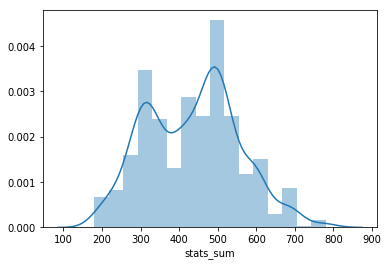

In [6]:
pokemon['stats_sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
print pokemon['stats_sum'].describe()
sns.distplot(pokemon['stats_sum'])

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


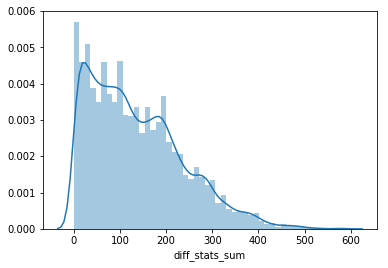

In [7]:
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


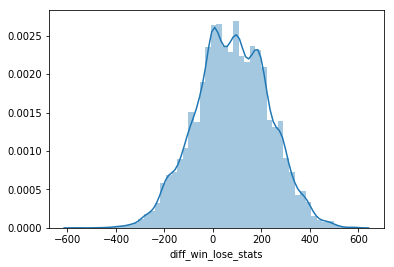

In [8]:
combats_stats_sum['Loser'] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.xlabel("diff_win_lose_stats")
plt.show()

In [9]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = diff_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
print ("Surpassing one's superiors Battle number : " + str(len(surpassing_stats_sum)))
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name.join(combats_stats_sum["diff"]).head(10)

Surpassing one's superiors Battle number : 5716


,First_pokemon,Second_pokemon,Winner,diff
5,Joltik,Aegislash Shield Forme,Joltik,-201
36,Pancham,Whismur,Whismur,-108
37,Clauncher,Dusclops,Clauncher,-125
42,Goomy,Bouffalant,Goomy,-190
51,Mega Rayquaza,Aegislash Shield Forme,Aegislash Shield Forme,-260
158,Bouffalant,Vullaby,Vullaby,-120
168,Keldeo Resolute Forme,Arbok,Arbok,-142
174,Gothorita,Volcanion,Gothorita,-210
180,Sewaddle,Mandibuzz,Sewaddle,-200
187,Pangoro,Mantyke,Mantyke,-150


In [10]:
surpassing_name.join(combats_stats_sum['diff']).sort_values(by = 'diff').head(5)

,First_pokemon,Second_pokemon,Winner,diff
5861,Mega Rayquaza,Cleffa,Cleffa,-562
2480,Mega Rayquaza,Cleffa,Cleffa,-562
41824,Shedinja,Mega Rayquaza,Shedinja,-544
3506,Mega Rayquaza,Inkay,Inkay,-492
20527,Arceus,Shedinja,Shedinja,-484


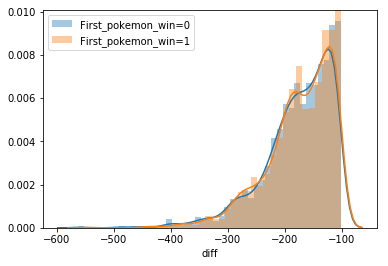

In [11]:
combats_stats_sum['First_Win'] = combats_stats_sum.apply(lambda x : 1 if x['First_pokemon'] == x['Winner'] else 0, axis = 1)
surpassing_stats_sum = combats_stats_sum[combats_stats_sum['diff']<-100]
sns.distplot(surpassing_stats_sum[surpassing_stats_sum['First_Win']==0]['diff'],label='First_pokemon_win=0')
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win=1")
plt.legend()
plt.show()

-First_Win=0-
count    26065.000000
mean        76.155764
std        152.292707
min       -562.000000
25%        -27.000000
50%         79.000000
75%        185.000000
max        585.000000
Name: diff, dtype: float64
-First_Win=1-
count    23935.000000
mean        83.719072
std        147.563182
min       -544.000000
25%        -13.000000
50%         82.000000
75%        190.000000
max        590.000000
Name: diff, dtype: float64


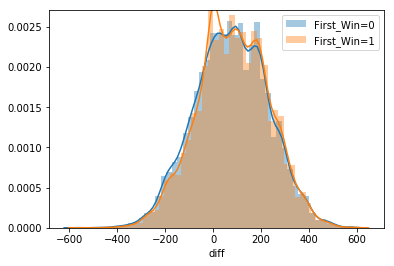

In [12]:
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"], label="First_Win=0")
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"], label="First_Win=1")
print ("-First_Win=0-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"].describe())
print ("-First_Win=1-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"].describe())
plt.legend()
plt.show()

In [13]:
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
list(pokemon["Type 1"].drop_duplicates())

There are 18 Types.


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

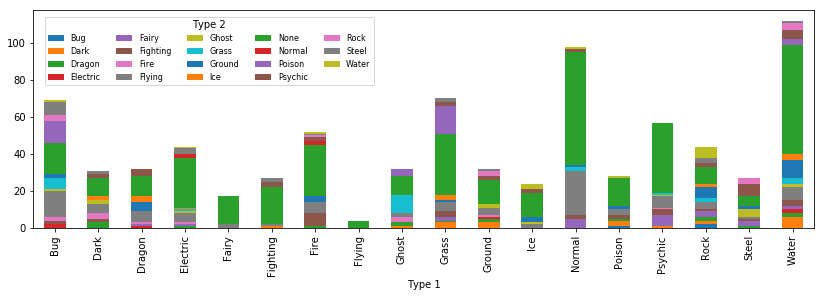

In [14]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

In [15]:
Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 0.5}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Diffender, Column is Attacker")
df_type_relation

Row is Diffender, Column is Attacker


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0
Fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
Fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0
Grass,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


count    50000.000000
mean         1.146062
std          0.869392
min          0.031250
25%          0.500000
50%          1.000000
75%          1.000000
max         16.000000
Name: Relation, dtype: float64


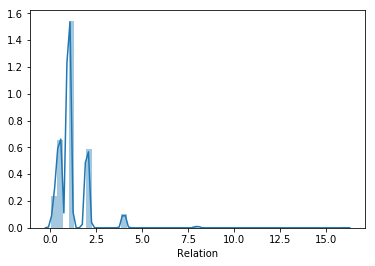

In [16]:
pokemon["Type"] = pokemon.apply(lambda x: x["Type 1"]+"/"+x["Type 2"], axis=1)
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
combats_type = combats[cols].replace(type_dict)
combats_type["Loser"] = combats_type.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)

zero_dict = {0: 0.25}
df_type_relation = df_type_relation[:].replace(zero_dict)

def calcRelation(combats_type):
    r0 = 1
    win_type1 = combats_type["Winner"].split("/")[0]
    win_type2 = combats_type["Winner"].split("/")[1]
    lose_type1 = combats_type["Loser"].split("/")[0]
    lose_type2 = combats_type["Loser"].split("/")[1]
    if win_type2 != "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r3 = df_type_relation[win_type2][lose_type1]
        r4 = df_type_relation[win_type2][lose_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif win_type2 != "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r3 = df_type_relation[win_type2][lose_type1]
        r = r0 * r1 * r3
    elif win_type2 == "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r = r0 * r1 * r2
    elif win_type2 == "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r = r0 * r1
    return r

combats_type["Relation"] = combats_type.apply(lambda x: calcRelation(x), axis = 1)
print (combats_type["Relation"].describe())
sns.distplot(combats_type["Relation"])
plt.show()

In [17]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

Mewtwo                152
Aerodactyl            136
Infernape             136
Jirachi               134
Deoxys Speed Forme    133
Slaking               133
Murkrow               130
Mega Absol            130
Mega Houndoom         128
Mega Aerodactyl       127
Name: Winner, dtype: int64


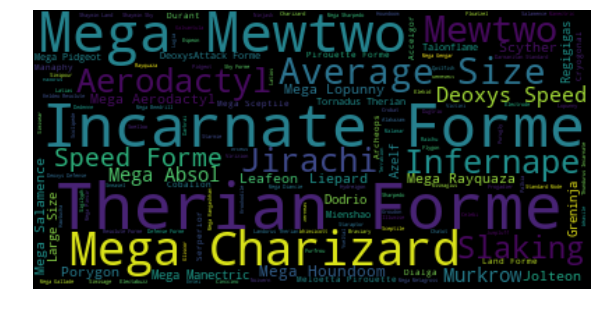

In [18]:
combats_names = combats[cols].replace(names_dict)
print (combats_names["Winner"].value_counts()[:10])
winners = list(combats_names["Winner"])
winners_str = [str(i) for i in winners]
winners_text = (",").join(winners_str)
wc = WordCloud(background_color= "black", random_state=1, margin=3).generate(winners_text)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [19]:
first_num = combats_names["First_pokemon"].value_counts()
second_num = combats_names["Second_pokemon"].value_counts()
battle_num = first_num + second_num
battle_win = pd.DataFrame({"battle": battle_num, "win": combats_names["Winner"].value_counts()}, columns=["battle", "win"])
battle_win["ratio"] = battle_win["win"]/battle_win["battle"]
battle_win.sort_values(by=["ratio"], ascending=False).head(10)

,battle,win,ratio
Mega Aerodactyl,129,127.0,0.984496
Weavile,119,116.0,0.974790
Tornadus Therian Forme,125,121.0,0.968000
Mega Beedrill,119,115.0,0.966387
Aerodactyl,141,136.0,0.964539
Mega Lopunny,129,124.0,0.961240
Greninja,127,122.0,0.960630
Meloetta Pirouette Forme,123,118.0,0.959350
Mega Mewtwo Y,125,119.0,0.952000
Mega Sharpedo,120,114.0,0.950000


In [20]:
battle_win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, Abomasnow to Zygarde Half Forme
Data columns (total 3 columns):
battle    783 non-null int64
win       782 non-null float64
ratio     782 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.5+ KB


In [21]:
battle_win[battle_win["win"].isnull()]

,battle,win,ratio
Shuckle,135,NaN,NaN


In [22]:
battle_win.loc["Shuckle", ["win", "ratio"]] = 0
battle_win[battle_win.index=="Shuckle"]

,battle,win,ratio
Shuckle,135,0.0,0.0


In [23]:
id_dict = dict(zip(pokemon['Name'], pokemon['#']))
battle_win["Name"] = battle_win.index
battle_win["#"] = battle_win["Name"].replace(id_dict)
ratio_dict = dict(zip(battle_win['#'], battle_win['ratio']))
pokemon["ratio"] = pokemon["#"].replace(ratio_dict)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,Type,ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,Grass/Poison,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,Grass/Poison,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,Grass/Poison,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,Grass/Poison,0.560000
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,309,Fire/None,0.491071


In [24]:
nobattle_pokemon = pokemon[pokemon["ratio"]>1]
print ("There are {} pokemons have NaN ratio.".format(len(nobattle_pokemon.index)))
nobattle_pokemon[["#", "Name", "ratio"]]

There are 17 pokemons have NaN ratio.


,#,Name,ratio
11,12,Blastoise,12.0
32,33,Sandshrew,33.0
45,46,Wigglytuff,46.0
62,63,NaN,63.0
65,66,Poliwag,66.0
77,78,Victreebel,78.0
89,90,Magneton,90.0
143,144,Ditto,144.0
182,183,Ariados,183.0
235,236,Ursaring,236.0


In [25]:
pokemon.loc[62, "Name"] = "Primeape"
pokemon[pokemon["Name"]=="Primeape"][["#", "Name", "ratio"]]

,#,Name,ratio
62,63,Primeape,63.0


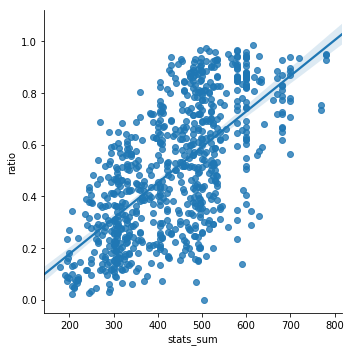

In [26]:
battle_pokemon = pokemon[pokemon["ratio"] <= 1]
sns.lmplot(x="stats_sum", y="ratio", data=battle_pokemon)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(battle_pokemon["stats_sum"].values.reshape(-1, 1), battle_pokemon["ratio"].values.reshape(-1, 1))
nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))
nobattle_pokemon[["#", "Name", "ratio"]]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,#,Name,ratio
11,12,Blastoise,0.631706
32,33,Sandshrew,0.314318
45,46,Wigglytuff,0.500611
62,63,NaN,0.528210
65,66,Poliwag,0.314318
77,78,Victreebel,0.576508
89,90,Magneton,0.542009
143,144,Ditto,0.297758
182,183,Ariados,0.438513
235,236,Ursaring,0.590307


In [28]:
combats_add_data = combats.copy()
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))
combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)
combats_add_data["First_pokemon_hp"] = combats_add_data["First_pokemon"].replace(hp_dict)
combats_add_data["First_pokemon_attack"] = combats_add_data["First_pokemon"].replace(attack_dict)
combats_add_data["First_pokemon_defense"] = combats_add_data["First_pokemon"].replace(defense_dict)
combats_add_data["First_pokemon_spattack"] = combats_add_data["First_pokemon"].replace(spattack_dict)
combats_add_data["First_pokemon_spdefense"] = combats_add_data["First_pokemon"].replace(spdefense_dict)
combats_add_data["First_pokemon_speed"] = combats_add_data["First_pokemon"].replace(speed_dict)
combats_add_data["First_pokemon_stats"] = combats_add_data["First_pokemon"].replace(stats_sum_dict)
combats_add_data["First_pokemon_ratio"] = combats_add_data["First_pokemon"].replace(ratio_dict)
combats_add_data["Second_pokemon_type"] = combats_add_data["Second_pokemon"].replace(type_dict)
combats_add_data["Second_pokemon_hp"] = combats_add_data["Second_pokemon"].replace(hp_dict)
combats_add_data["Second_pokemon_attack"] = combats_add_data["Second_pokemon"].replace(attack_dict)
combats_add_data["Second_pokemon_defense"] = combats_add_data["Second_pokemon"].replace(defense_dict)
combats_add_data["Second_pokemon_spattack"] = combats_add_data["Second_pokemon"].replace(spattack_dict)
combats_add_data["Second_pokemon_spdefense"] = combats_add_data["Second_pokemon"].replace(spdefense_dict)
combats_add_data["Second_pokemon_speed"] = combats_add_data["Second_pokemon"].replace(speed_dict)
combats_add_data["Second_pokemon_stats"] = combats_add_data["Second_pokemon"].replace(stats_sum_dict)
combats_add_data["Second_pokemon_ratio"] = combats_add_data["Second_pokemon"].replace(ratio_dict)


def calcTypeRelation(combats_add_data):
    r0 = 1
    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r = r0 * r1 * r3
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r = r0 * r1 * r2
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r = r0 * r1
    return r

combats_add_data["Relation"] = combats_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
combats_add_data["First_win"] = combats_add_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)
noneed_cols = ["First_pokemon", "Second_pokemon", "Winner", "First_pokemon_type", "Second_pokemon_type"]
combats_add_data = combats_add_data.drop(noneed_cols, axis=1)
combats_add_data.head()

,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,First_pokemon_ratio,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio,Relation,First_win
0,50,64,50,45,50,41,300,0.227273,70,70,40,60,40,60,340,0.424779,0.5,0
1,91,90,72,90,129,108,580,0.896000,91,129,90,72,90,108,580,0.853659,4.0,0
2,55,40,85,80,105,40,405,0.236220,75,75,75,125,95,40,485,0.156716,1.0,0
3,40,40,40,70,40,20,250,0.032520,77,120,90,60,90,48,485,0.278571,0.5,0
4,70,60,125,115,70,55,495,0.355072,20,10,230,10,230,5,505,0.000000,4.0,1


In [29]:
from sklearn.model_selection import train_test_split

X = combats_add_data.drop("First_win", axis=1)
y = combats_add_data["First_win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
print("X_train.shape = " + str(X_train.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

X_train.shape = (40000, 17)
X_test.shape = (10000, 17)
y_train.shape = (40000,)
y_test.shape = (10000,)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_test, y_test)*100, 2)
acc_log

88.68

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

85.66

In [32]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

78.11

In [33]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


81.5

In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

92.81

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

94.98

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 
              'Naive Bayes', 'Perceptron', 'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_knn, acc_gaussian, acc_perceptron, 
              acc_decision_tree, acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,94.98
4,Decision Tree,92.81
0,Logistic Regression,88.68
1,KNN,85.66
3,Perceptron,81.50
2,Naive Bayes,78.11


In [37]:
effective = pd.DataFrame()
effective["feature_name"] = X.columns.tolist()
effective["feature_importance"] = random_forest.feature_importances_
effective.sort_values("feature_importance",ascending=False)

,feature_name,feature_importance
5,First_pokemon_speed,0.199326
13,Second_pokemon_speed,0.186709
7,First_pokemon_ratio,0.166050
15,Second_pokemon_ratio,0.163258
6,First_pokemon_stats,0.036914
14,Second_pokemon_stats,0.032304
1,First_pokemon_attack,0.028844
9,Second_pokemon_attack,0.026879
16,Relation,0.021999
11,Second_pokemon_spattack,0.020767


In [38]:
pokemon.sort_values("Speed",ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,Type,ratio
431,432,Deoxys Speed Forme,Psychic,None,50,95,90,95,90,180,3,True,600,Psychic/None,0.917241
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False,456,Bug/Flying,0.923077
428,429,Deoxys Normal Forme,Psychic,None,50,150,50,150,50,150,3,True,600,Psychic/None,0.933962
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615,Rock/Flying,0.984496
71,72,Mega Alakazam,Psychic,None,55,50,65,175,95,150,1,False,590,Psychic/None,0.781818
429,430,DeoxysAttack Forme,Psychic,None,50,180,20,180,20,150,3,True,600,Psychic/None,0.902985
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495,Bug/Poison,0.966387
275,276,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,3,False,630,Grass/Dragon,0.944444
678,679,Accelgor,Bug,None,80,70,40,100,60,145,5,False,495,Bug/None,0.921875
164,165,Mega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780,Psychic/None,0.952000


In [39]:
tests = pd.read_csv('tests.csv')
tests_add_data = tests.copy()
tests_add_data["First_pokemon_type"] = tests_add_data["First_pokemon"].replace(type_dict)
tests_add_data["First_pokemon_hp"] = tests_add_data["First_pokemon"].replace(hp_dict)
tests_add_data["First_pokemon_attack"] = tests_add_data["First_pokemon"].replace(attack_dict)
tests_add_data["First_pokemon_defense"] = tests_add_data["First_pokemon"].replace(defense_dict)
tests_add_data["First_pokemon_spattack"] = tests_add_data["First_pokemon"].replace(spattack_dict)
tests_add_data["First_pokemon_spdefense"] = tests_add_data["First_pokemon"].replace(spdefense_dict)
tests_add_data["First_pokemon_speed"] = tests_add_data["First_pokemon"].replace(speed_dict)
tests_add_data["First_pokemon_stats"] = tests_add_data["First_pokemon"].replace(stats_sum_dict)
tests_add_data["First_pokemon_ratio"] = tests_add_data["First_pokemon"].replace(ratio_dict)
tests_add_data["Second_pokemon_type"] = tests_add_data["Second_pokemon"].replace(type_dict)
tests_add_data["Second_pokemon_hp"] = tests_add_data["Second_pokemon"].replace(hp_dict)
tests_add_data["Second_pokemon_attack"] = tests_add_data["Second_pokemon"].replace(attack_dict)
tests_add_data["Second_pokemon_defense"] = tests_add_data["Second_pokemon"].replace(defense_dict)
tests_add_data["Second_pokemon_spattack"] = tests_add_data["Second_pokemon"].replace(spattack_dict)
tests_add_data["Second_pokemon_spdefense"] = tests_add_data["Second_pokemon"].replace(spdefense_dict)
tests_add_data["Second_pokemon_speed"] = tests_add_data["Second_pokemon"].replace(speed_dict)
tests_add_data["Second_pokemon_stats"] = tests_add_data["Second_pokemon"].replace(stats_sum_dict)
tests_add_data["Second_pokemon_ratio"] = tests_add_data["Second_pokemon"].replace(ratio_dict)
tests_add_data["Relation"] = tests_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
noneed_cols = ["First_pokemon", "Second_pokemon", "First_pokemon_type", "Second_pokemon_type"]
tests_add_data = tests_add_data.drop(noneed_cols, axis=1)
y_predict = random_forest.predict(tests_add_data)
data = {"First_pokemon": tests["First_pokemon"], "Second_pokemon": tests["Second_pokemon"], "First_win": y_predict}
submission = pd.DataFrame(data=data, columns=["First_pokemon", "Second_pokemon", "First_win"])
winner = pd.DataFrame(submission.apply(lambda x: x["First_pokemon"] if x["First_win"]==1 else x["Second_pokemon"], axis=1), columns=["Winner"])
submission = pd.concat([submission, winner], axis=1)
submission = submission.drop(["First_win"], axis=1)
submission

,First_pokemon,Second_pokemon,Winner
0,129,117,129
1,660,211,211
2,706,115,706
3,195,618,618
4,27,656,27
5,126,222,126
6,436,207,436
7,121,36,36
8,169,636,169
9,302,688,302


In [40]:
submission.to_csv(path_or_buf = 'submission.csv')